<img src='image/coverphoto.jpeg'>

# Titanic Survival Prediction
### Jae Heon Kim

## Overview


This project is intended for practice and aimed at improving skills in developing machine learning classification models. It is not a real-world project with a specific business problem to solve, but rather a means of honing techniques and exploring different approaches to modeling. The focus is on gaining experience in data preparation, exploratory data analysis, feature engineering, model selection, hyperparameter tuning, and model evaluation. The goal is to gain a deeper understanding of the principles and best practices of machine learning, as well as to build a solid foundation for tackling more complex real-world problems in the future.

## Business Understanding

The Titanic dataset can be used to predict the survival of passengers on board the Titanic. By developing a machine learning classification model, we can gain insights into the factors that contribute to survival, and potentially identify individuals who may be at higher risk of not surviving in similar situations. This could be valuable for companies or organizations in the travel industry, such as cruise ship companies or airlines, who want to ensure the safety of their passengers in the event of an emergency.

## Data Understanding

### Data Introduction

The Titanic dataset is a popular machine learning dataset that provides information on the fate of passengers aboard the Titanic, including whether they survived or not, as well as demographic and trip-related information.

#### Source
The dataset comes from seaborn library.

#### Data Description
The dataset contains information on 891 passengers who were aboard the Titanic, of which 342 survived and 549 perished. Each row in the dataset represents a single passenger and the columns contain information about that passenger, including:

- `survived`: Whether the passenger survived (1) or not (0)
- `pclass`: The passenger's ticket class (1st, 2nd, or 3rd)
- `sex`: The passenger's gender
- `age`: The passenger's age in years
- `sibsp`: The number of siblings/spouses aboard the Titanic
- `parch`: The number of parents/children aboard the Titanic
- `fare`: The fare paid by the passenger
- `cabin`: The passenger's cabin number
- `embarked`: The port where the passenger embarked (C = Cherbourg, Q = Queenstown, S = Southampton)
- `deck`: The level on the Titanic where a passenger's cabin was located
- `alone`: The "Alone" variable indicates whether a passenger was traveling alone or with family members on the Titanic. It is a binary variable that takes the value 1 if the passenger was traveling alone, and 0 if the passenger was traveling with one or more family members.

### Imports

In [1]:
# Import basic packages
import pandas as pd
import numpy as np
import json
import copy
import datetime

# Import visualization packages
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
%matplotlib inline

# Import scipy
import scipy as stats

# Import xgboost
from xgboost import XGBRegressor, XGBClassifier

# Import sklearn pacakages
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score,\
                                    GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing   import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder,\
                                    normalize
from sklearn.linear_model    import LinearRegression, LogisticRegression
from sklearn.tree            import plot_tree, DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.naive_bayes     import MultinomialNB, GaussianNB
from sklearn.svm             import SVC
from sklearn.ensemble        import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier,\
                                    ExtraTreesClassifier, VotingClassifier, StackingClassifier,\
                                    AdaBoostClassifier
from sklearn.metrics         import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,\
                                    classification_report, r2_score, mean_squared_error, mean_absolute_error,\
                                    ConfusionMatrixDisplay, RocCurveDisplay, log_loss, confusion_matrix
from sklearn.pipeline        import Pipeline
from sklearn.compose         import ColumnTransformer
from sklearn.impute          import SimpleImputer
from sklearn.inspection      import permutation_importance
from sklearn                 import set_config
from sklearn.exceptions      import DataConversionWarning
set_config(display='diagram')

# Import warning filters
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.resetwarnings()

### Functions

In [2]:
def explore_column(dataframe, column):
    """
    This functions takes a dataframe and a column as inputs.
    The function returns number of unique values, each of the unique values and
    visualizations that help understand the shape of distribution of entries a specific column in the dataframe.
    """
    
    # Print the column name
    print(f"======== Column: {column} ========")
        
    # Print number of unique values for the column
    print(f"Number of unique values in the {column}:", dataframe[column].nunique(), "\n\n")
        
    # Print each of the unique values for the column
    if dataframe[column].nunique() <= 20:
        print(f"Unique values in the {column}:", dataframe[column].unique())
    else:
        print("There are more than 20 unique entries.")
    print("\n\n")
        
    # Print density value-counts of each unique entry 
    print("Value counts of unique entries:")
    print(dataframe[column].value_counts(normalize=True), "\n\n")
    
    # Display visualizations of the distribution
    sns.displot(x=column, data=dataframe, stat='density', hue='survived')
    plt.title(f"Distribution of {column} by survival outcome")
    plt.show()

Survey the dataset as a whole before breaking down into column analysis.

In [3]:
# Call the data
df = sns.load_dataset('titanic')

# Make a deepcopy of data
df_deepcopy = copy.deepcopy(df)

# Display the dataframe's head
display(df.head())

# Display information about the data
print("\n\n")
print(df.info())

# Check for missing entries by column
print("\n\n")
print("Missing entry sums by columns:")
print(df.isna().sum())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None



Missing entry sums by columns:
survived         0
pclass           0

- We notice that there needs to be some imputations to be done for the `age`.
- As for `deck`, the majority of entries is missing so it would be better to assign missing values to `unknown` and treat them separately as one group.

We will now assess each column individually.

### Column Analysis

In this section of the project, we will analyze each individual column in depth, explore the shape of its distribution, make important observations and decide what additional column-specific work needs to be done for future modeling process.

#### `survived`
This column has binary entries: 1 for survived, 0 for not. This is going to be our target variable, one that we ultimately want to predict correctly.

In [4]:
df['survived'] = df['survived'].astype(str).astype('category')
df['pclass'] = df['pclass'].astype(str).astype('category')

======== Column: survived ========
Number of unique values in the survived: 2 


Unique values in the survived: ['0', '1']
Categories (2, object): ['0', '1']



Value counts of unique entries:
0    0.616162
1    0.383838
Name: survived, dtype: float64 




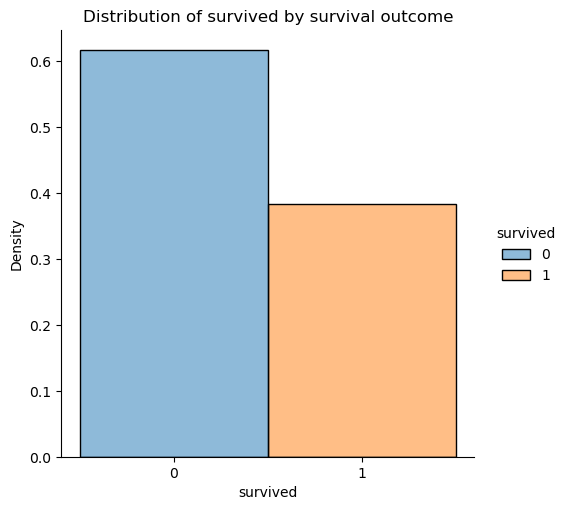

In [5]:
explore_column(df, 'survived')

- 61.6% of people on board died and 38.4% survived.
- A random guess that predicts everyone's death will have accuracy of 61.6%. We want to build the model that does better than this.

#### `class`

======== Column: class ========
Number of unique values in the class: 3 


Unique values in the class: ['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']



Value counts of unique entries:
Third     0.551066
First     0.242424
Second    0.206510
Name: class, dtype: float64 




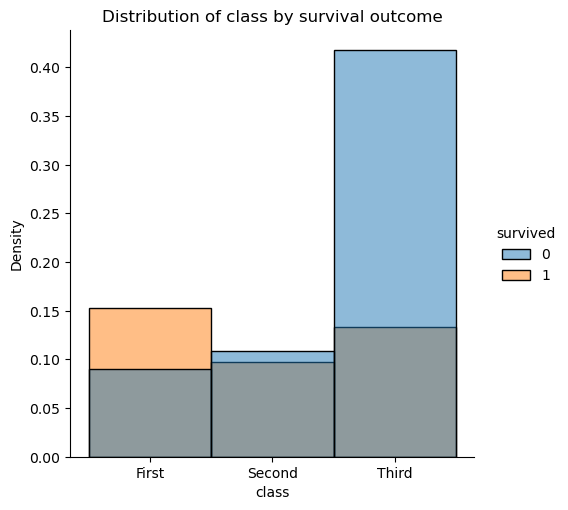

In [6]:
explore_column(df, 'class')

- Column `pclass` was an identical column, so will be dropped from our final dataset.
- This is the only ordinal category and the graph shows that a passenger is more likely to have survived when belonging to a higher class.
- We don't know for sure if higher classes were equipped better with escape tools, if their locations were easier for escape or if they received extra aid on average.

#### `sex`

======== Column: sex ========
Number of unique values in the sex: 2 


Unique values in the sex: ['male' 'female']



Value counts of unique entries:
male      0.647587
female    0.352413
Name: sex, dtype: float64 




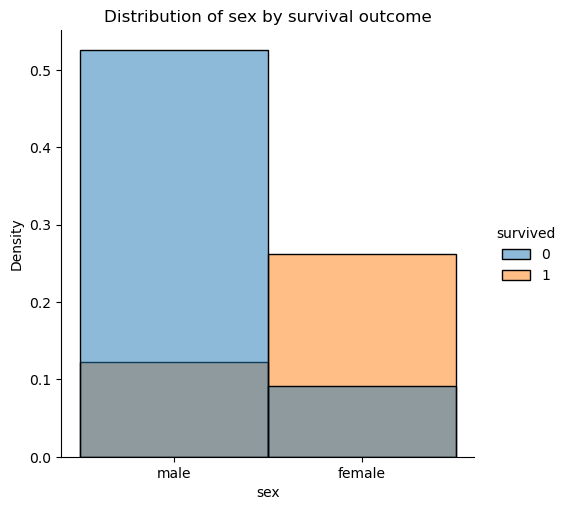

In [7]:
explore_column(df, 'sex')

- Females are much more likely to survive than men.

#### `age`

======== Column: age ========
Number of unique values in the age: 88 


There are more than 20 unique entries.



Value counts of unique entries:
24.00    0.042017
22.00    0.037815
18.00    0.036415
19.00    0.035014
28.00    0.035014
           ...   
36.50    0.001401
55.50    0.001401
0.92     0.001401
23.50    0.001401
74.00    0.001401
Name: age, Length: 88, dtype: float64 




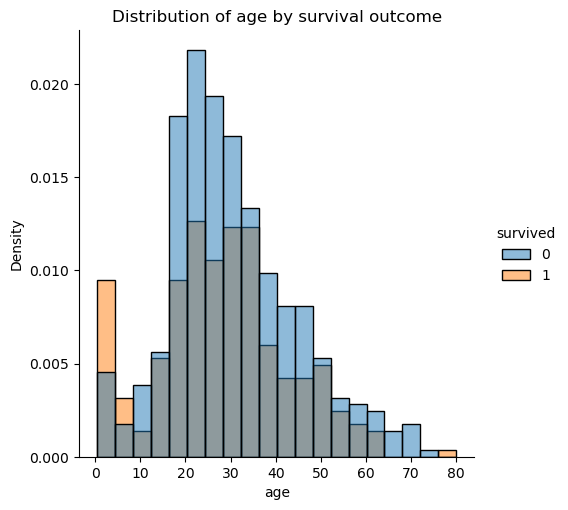

In [8]:
explore_column(df, 'age')

- People younger than 20, older than 50 have higher survival rates than people in 20 ~ 50

#### `sibsp`

======== Column: sibsp ========
Number of unique values in the sibsp: 7 


Unique values in the sibsp: [1 0 3 4 2 5 8]



Value counts of unique entries:
0    0.682379
1    0.234568
2    0.031425
4    0.020202
3    0.017957
8    0.007856
5    0.005612
Name: sibsp, dtype: float64 




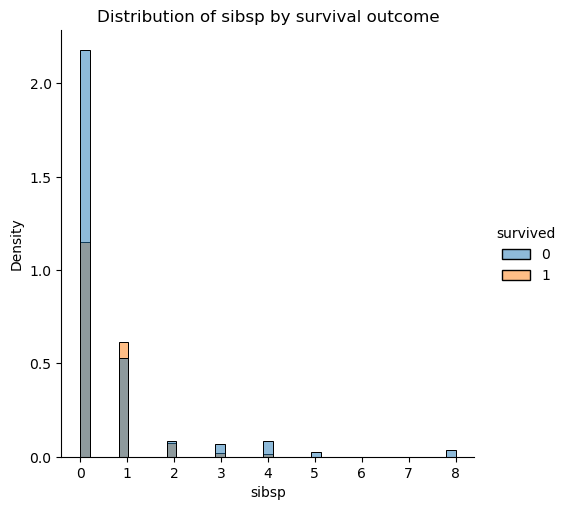

In [9]:
explore_column(df, 'sibsp')

- Having one or two siblings greatly increased survival rates. Having more than that didn't help actually.

#### `parch`

======== Column: parch ========
Number of unique values in the parch: 7 


Unique values in the parch: [0 1 2 5 3 4 6]



Value counts of unique entries:
0    0.760943
1    0.132435
2    0.089787
5    0.005612
3    0.005612
4    0.004489
6    0.001122
Name: parch, dtype: float64 




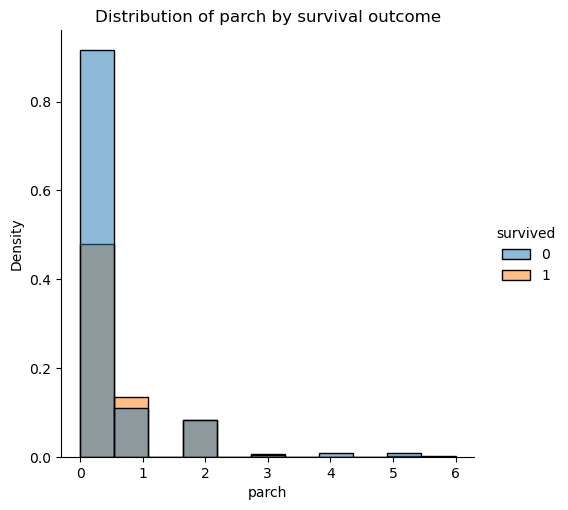

In [10]:
explore_column(df, 'parch')

- Having one or two parents/children helped survival rates. More or less than that didn't.

#### `fare`

======== Column: fare ========
Number of unique values in the fare: 248 


There are more than 20 unique entries.



Value counts of unique entries:
8.0500     0.048260
13.0000    0.047138
7.8958     0.042649
7.7500     0.038159
26.0000    0.034792
             ...   
35.0000    0.001122
28.5000    0.001122
6.2375     0.001122
14.0000    0.001122
10.5167    0.001122
Name: fare, Length: 248, dtype: float64 




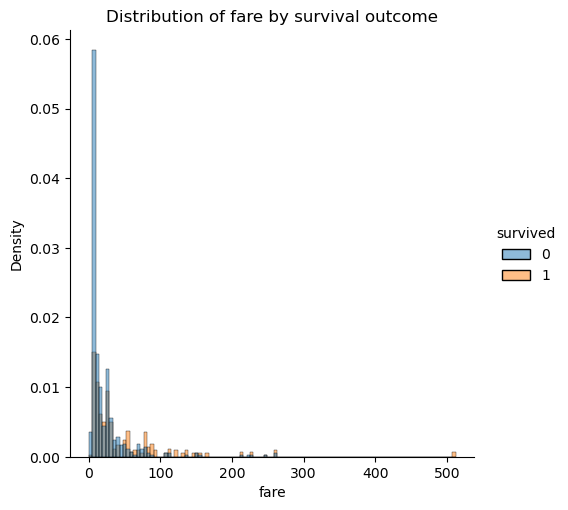

In [11]:
explore_column(df, 'fare')

- People's fare prices were positively associated with chances of survival.
- This maybe a restatement of the relationship betweenn different classes and survival rates, since fare prices in general are strongly related to the classes.

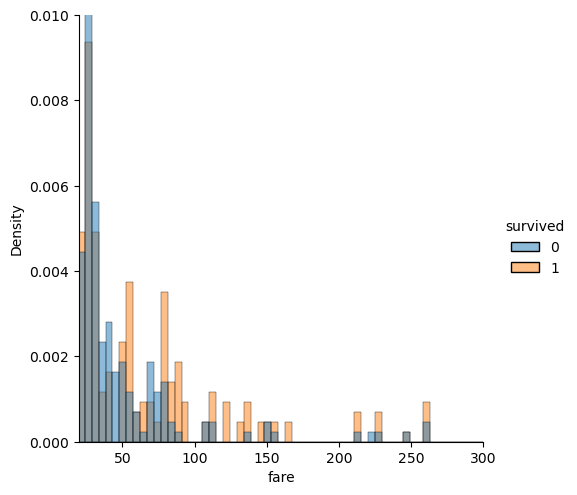

In [12]:
sns.displot(x='fare', data=df, stat='density', hue='survived')
plt.xlim((20,300))
plt.ylim((0, 0.01))
plt.show()

- This graph magnifies the right tail of the whole graph, and it confirms the observation above.

#### `embarked` and `embark_town`

======== Column: embark_town ========
Number of unique values in the embark_town: 3 


Unique values in the embark_town: ['Southampton' 'Cherbourg' 'Queenstown' nan]



Value counts of unique entries:
Southampton    0.724409
Cherbourg      0.188976
Queenstown     0.086614
Name: embark_town, dtype: float64 




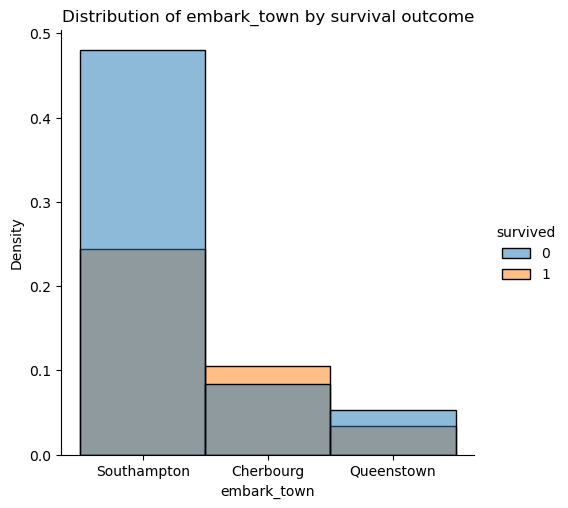

In [13]:
explore_column(df, 'embark_town')

- The column `embarked` is identical to `embark_town`, thus will be dropped.
- This column has 2 missing entries. We will later impute these with mode, since it is a categorical data type and the mode accounts for more than 70% of the data points we have available.
- This shows that people who boarded from Southampton were most likely to have died. People who embarked from Cherbourg had greater chances of surviaval than deaths.

#### `who`

======== Column: who ========
Number of unique values in the who: 3 


Unique values in the who: ['man' 'woman' 'child']



Value counts of unique entries:
man      0.602694
woman    0.304153
child    0.093154
Name: who, dtype: float64 




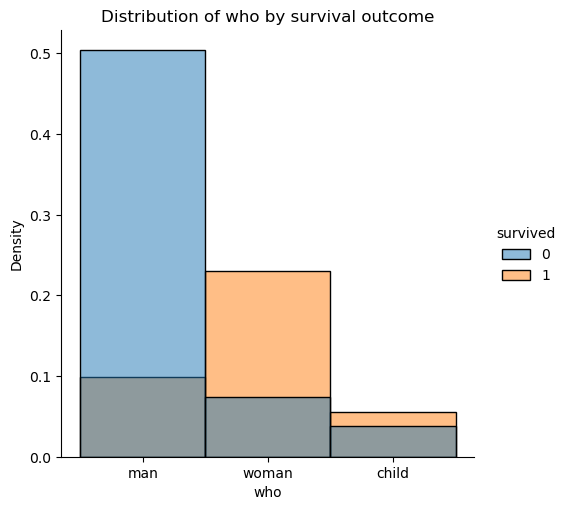

In [14]:
explore_column(df, 'who')

- 80% of men died. 66% of women lived. Children death rates are greater than death rates of women.

#### `adult_male`

======== Column: adult_male ========
Number of unique values in the adult_male: 2 


Unique values in the adult_male: [ True False]



Value counts of unique entries:
True     0.602694
False    0.397306
Name: adult_male, dtype: float64 




<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


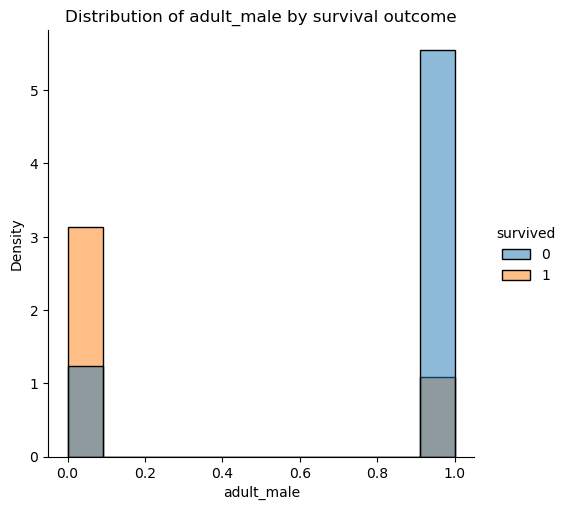

In [15]:
explore_column(df, 'adult_male')

- This affirms again that dults male were very likely to have died.
- This is a binary presentation of the previous column to magnify the chances of survival adult males were facing.

#### `deck`

======== Column: deck ========
Number of unique values in the deck: 7 


Unique values in the deck: [NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']



Value counts of unique entries:
C    0.290640
B    0.231527
D    0.162562
E    0.157635
A    0.073892
F    0.064039
G    0.019704
Name: deck, dtype: float64 




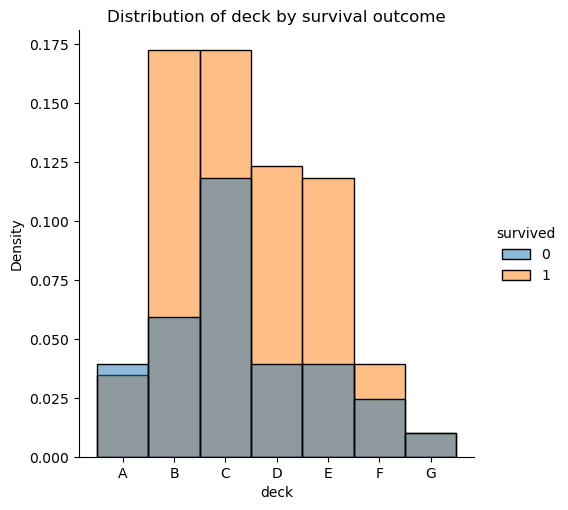

In [16]:
explore_column(df, 'deck')

- Certain deck-levles have much better survival rates than the others. 
- 5 of 7 known decks had more survivals than deaths. This is probably the result of so much missing values from the data for this column.

#### `alone`

======== Column: alone ========
Number of unique values in the alone: 2 


Unique values in the alone: [False  True]



Value counts of unique entries:
True     0.602694
False    0.397306
Name: alone, dtype: float64 




<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


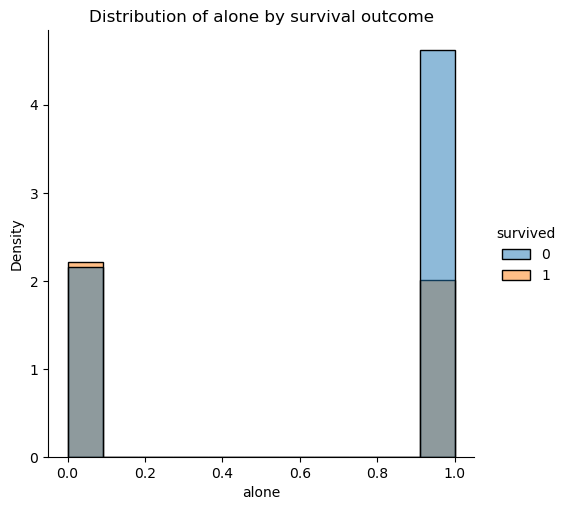

In [17]:
explore_column(df, 'alone')

- Being alone lowered the chances of survival on Titanic.

After surveying column by column:

- `pclass`, `embarked`, `alive` columns are identical to `class`, `embark_town` and `survived` so will be dropped to avoid redundancy.
- `deck`'s missing values will be grouped into a new category `unknown`.
- `age`'s missing values will be imputed with mean since it's continuous and numeric in nature.
- `embark_town`'s missing values will be imputed with mode since the mode accounts for more than 70% of the available data and dtype is categorical.

## Data Preparation

Since we modified the original dataframe for exploratory data analysis, we will revert back to the original copy and start our data cleaning.

In [18]:
# Recall the original data
df = copy.deepcopy(df_deepcopy)

# Drop the repeating columns
df = df.drop(columns=['pclass', 'embarked', 'alive'], axis=1)

# Display new dataframe
display(df.head())

,survived,sex,age,sibsp,parch,fare,class,who,adult_male,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,man,True,NaN,Southampton,False
1,1,female,38.0,1,0,71.2833,First,woman,False,C,Cherbourg,False
2,1,female,26.0,0,0,7.9250,Third,woman,False,NaN,Southampton,True
3,1,female,35.0,1,0,53.1000,First,woman,False,C,Southampton,False
4,0,male,35.0,0,0,8.0500,Third,man,True,NaN,Southampton,True


Now define our predictor variables X and target variable y.

In [19]:
# Define X and y
X = df.drop('survived', axis=1)
y = df['survived']

### Label-Encoding Target Variable

In [20]:
le = LabelEncoder()

y = le.fit_transform(y)

### Train-Test-Split

In [21]:
# Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=817)

Then categorize features by their data types

In [22]:
target_column = ['survived']
numeric_columns = ['age', 'fare', 'sibsp', 'parch']
ordinal_columns = ['class']
nominal_columns = ['who', 'adult_male', 'deck', 'embark_town', 'alone']

### Imputation

In [23]:
X_train['embark_town'] = X_train['embark_town'].fillna(X_train['embark_town'].mode().iloc[0])
X_test['embark_town'] = X_test['embark_town'].fillna(X_test['embark_town'].mode().iloc[0])

In [24]:
deck_categories = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'unknown']

X_train['deck'] = X_train['deck'].astype('category').cat.set_categories(deck_categories)
X_test['deck'] = X_test['deck'].astype('category').cat.set_categories(deck_categories)

X_train['deck'] = X_train['deck'].fillna('unknown')
X_test['deck'] = X_test['deck'].fillna('unknown')

In [25]:
X_train['age'] = X_train['age'].fillna(X_train['age'].mean())
X_test['age'] = X_test['age'].fillna(X_test['age'].mean())

###  Preparing Categorical Columns for Feature Engineering

In [26]:
X_train['who'] = X_train['who'].astype('category')
X_test['who'] = X_test['who'].astype('category')

X_train['adult_male'] = X_train['adult_male'].astype('category')
X_test['adult_male'] = X_test['adult_male'].astype('category')

X_train['embark_town'] = X_train['embark_town'].astype('category')
X_test['embark_town'] = X_test['embark_town'].astype('category')

X_train['alone'] = X_train['alone'].astype('category')
X_test['alone'] = X_test['alone'].astype('category')

### Defining Pipelines

In [27]:
numeric_transformer = Pipeline(steps=[('ss', StandardScaler())])
ordinal_transformer = Pipeline(steps=[('oe', OrdinalEncoder())])
nominal_transformer = Pipeline(steps=[('ohe', OneHotEncoder(drop='first', sparse_output=True, handle_unknown='ignore'))])

ct = ColumnTransformer(transformers=[('ss', numeric_transformer, numeric_columns),
                                     ('oe', ordinal_transformer, ordinal_columns),
                                     ('ohe', nominal_transformer, nominal_columns)])

## Modeling

### Baseline

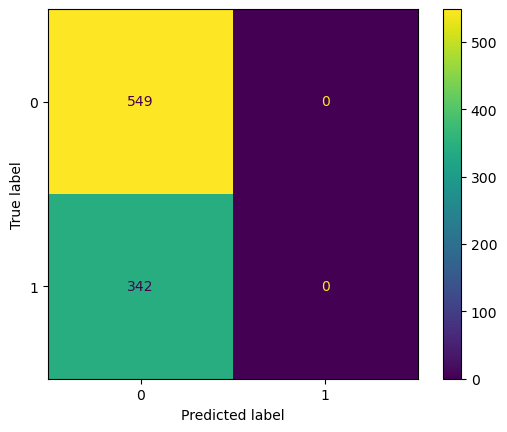

In [28]:
y_pred_base = np.zeros(891)

cm = confusion_matrix(y, y_pred_base)

cm_display = ConfusionMatrixDisplay(cm)

cm_display.plot()
plt.show()

In [29]:
baseline_accuracy = round(549/891, 3)

print(f"Accuracy of the model: {baseline_accuracy}")

Accuracy of the model: 0.616


- This is just another presentation of the idea stated earlier when studying the target variable, that a random effortless guess alone yields a model with accuracy level of 61.6%.
- Our subsequent models must perform better than this benchmark obviously.
- Better performance is not sufficient enough, considering that it building and implementing the model takes time and money, it has to do better than the cost of both factored in.

We will now run different types of classification models in search of the best one.

### Logistic Regression

In [30]:
# Create a logistic regression model with a specified random state
logistic_reg = LogisticRegression(random_state=817, max_iter=1000)

# Define the steps for pipeline
logistic_estimator = Pipeline(steps=[('ct', ct), 
                                     ('logistic_reg', logistic_reg)])

# Define hyperparameters to tune
logistic_grid = {'logistic_reg__penalty': ['l1', 'l2'],
                 'logistic_reg__C': [0.1, 1, 10],
                 'logistic_reg__solver': ['liblinear', 'saga']}

# Create a grid search object
logistic_grid_search = GridSearchCV(estimator=logistic_estimator, 
                                    param_grid=logistic_grid)

# Fit the grid search object to the data
logistic_grid_search.fit(X_train, y_train)

# Get the best estimator for logistic regression model
logistic_model = logistic_grid_search.best_estimator_

logistic_model.fit(X_train, y_train)

/Users/jaeheon/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ss',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['age', 'fare', 'sibsp',
                                                   'parch']),
                                                 ('oe',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['class']),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['who', 'adult_male', 'deck',
                                                   'embark_town', 'alone'])])),
                ('logistic_reg',
                 LogisticRegression(C=1, max_iter=1000, penalty='l1',
                                    random_state=817, solver='saga'))])

In [31]:
# Cross-validate
logistic_cv_accuracy = cross_val_score(logistic_model, X_train, y_train)

# Print cross-validation resultsa
print(f"Cross validation accuracy: {logistic_cv_accuracy.mean():.3f} (+/- {logistic_cv_accuracy.std():.3f})")

Cross validation accuracy: 0.822 (+/- 0.032)


In [32]:
logistic_accuracy = logistic_model.score(X_test, y_test)

print(f"Logistic regression's accuracy: {round(logistic_model.score(X_test, y_test), 3)}")

Logistic regression's accuracy: 0.806


### Decision Tree

In [33]:
dt_clf = DecisionTreeClassifier(random_state=817)

# Define steps of the pipeline
dt_estimator = Pipeline(steps=[('ct', ct), 
                               ('dt_clf', dt_clf)])

# Define hyperparameters to tune
dt_grid = {'dt_clf__max_depth': [10, 15, 20],
           'dt_clf__min_samples_split': [2, 5, 10],
           'dt_clf__min_samples_leaf': [1, 2, 4]}

# Create a grid search object
dt_grid_search = GridSearchCV(estimator=dt_estimator, 
                              param_grid=dt_grid)

# Fit the grid search object to the data
dt_grid_search.fit(X_train, y_train)

# Get the best estimator and print it
dt_model = dt_grid_search.best_estimator_

# Fit the best estimator
dt_model.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ss',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['age', 'fare', 'sibsp',
                                                   'parch']),
                                                 ('oe',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['class']),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['who', 'adult_male', 'deck',
                                                   'embark_town', 'alone'])])),
                ('dt_clf',
                 DecisionTreeClassifier(max_depth=10, min_samples_split=5,
                                        random_state=817))])

In [34]:
dt_cv_accuracy = cross_val_score(dt_model, X_train, y_train, cv=5) # cv = 5 for 5-fold cross validation

# Print the mean and standard deviation of the cross validation
print(f"Cross-validation accuracy: {dt_cv_accuracy.mean():.3f} (+/- {dt_cv_accuracy.std():.3f})")

Cross-validation accuracy: 0.838 (+/- 0.016)


In [35]:
dt_accuracy = round(dt_model.score(X_test, y_test), 3)

print(f"Decision tree's accuracy: {dt_accuracy}")

Decision tree's accuracy: 0.746


### K-Nearest Neighbors

In [36]:
knn_clf = KNeighborsClassifier()

knn_estimator = Pipeline([('ct', ct),
                          ('knn_clf', knn_clf)])

knn_grid = {'knn_clf__n_neighbors': [3, 5, 7, 9, 11],
            'knn_clf__weights': ['uniform', 'distance'],
            'knn_clf__metric': ['euclidean', 'manhattan', 'minkowski']}

knn_grid_search = GridSearchCV(estimator=knn_estimator,
                               param_grid=knn_grid,
                               scoring='accuracy')

knn_grid_search.fit(X_train, y_train)

knn_model = knn_grid_search.best_estimator_

knn_model.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ss',
                                                  Pipeline(steps=[('ss',
                                                                   StandardScaler())]),
                                                  ['age', 'fare', 'sibsp',
                                                   'parch']),
                                                 ('oe',
                                                  Pipeline(steps=[('oe',
                                                                   OrdinalEncoder())]),
                                                  ['class']),
                                                 ('ohe',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  ['who', 'adult_male', 'deck',
                                                   'embark_town', 'alone'])])),
                ('knn_clf',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=7))])

In [37]:
knn_cv_accuracy = cross_val_score(knn_model, X_train, y_train)

# Print the mean and standard deviation of the cross validation
print(f"Cross-validation accuracy: {knn_cv_accuracy.mean():.3f} (+/- {knn_cv_accuracy.std():.3f})")

Cross-validation accuracy: 0.817 (+/- 0.019)


In [38]:
knn_accuracy = round(knn_model.score(X_test, y_test), 3)

print(f"K-nearest neighbors' accuracy: {knn_accuracy}")

K-nearest neighbors' accuracy: 0.81


### Random Forest

In [39]:
rf_clf = RandomForestClassifier(random_state=817)

rf_estimator = Pipeline([('ct', ct), 
                         ('rf_clf', rf_clf)])

rf_grid = {'rf_clf__n_estimators': [100, 200, 300],
           'rf_clf__max_features': ['sqrt', 'log2'],
           'rf_clf__max_depth': [10, 20, None],
           'rf_clf__min_samples_split': [2, 5, 10],
           'rf_clf__min_samples_leaf': [1, 2, 4]}

rf_grid_search = GridSearchCV(estimator=rf_estimator, 
                              param_grid=rf_grid, 
                              scoring='accuracy')

rf_grid_search.fit(X_train, y_train)

rf_model = rf_grid_search.best_estimator_

In [40]:
rf_cv_accuracy = cross_val_score(rf_model, X_train, y_train)

# Print the mean and standard deviation of the cross validation
print(f"Cross-validation accuracy: {rf_cv_accuracy.mean():.3f} (+/- {rf_cv_accuracy.std():.3f})")

Cross-validation accuracy: 0.838 (+/- 0.024)


In [41]:
rf_accuracy = round(rf_model.score(X_test, y_test), 3)

print(f"Random forest's accuracy: {rf_accuracy}")

Random forest's accuracy: 0.81


### Extra Gradient Boosting

In [42]:
xgb_clf = XGBClassifier(random_state=817)

xgb_estimator = Pipeline([('ct', ct), 
                          ('xgb_clf', xgb_clf)])

xgb_grid = {'xgb_clf__learning_rate': [0.1, 0.01, 0.001],
            'xgb_clf__max_depth': [3, 6, 9],
            'xgb_clf__n_estimators': [100, 500, 1000],
            'xgb_clf__subsample': [0.5, 0.75, 1.0],
            'xgb_clf__colsample_bytree': [0.5, 0.75, 1.0],
            'xgb_clf__gamma': [0, 0.1, 0.2, 0.3, 0.4]}

xgb_grid_search = GridSearchCV(estimator=xgb_estimator,
                               param_grid=xgb_grid,
                               scoring='accuracy')

xgb_grid_search.fit(X_train, y_train)

xgb_model = xgb_grid_search.best_estimator_

In [43]:
xgb_cv_accuracy = cross_val_score(xgb_model, X_train, y_train)

# Print the mean and standard deviation of the cross validation
print(f"Cross-validation accuracy: {xgb_cv_accuracy.mean():.3f} (+/- {xgb_cv_accuracy.std():.3f})")

Cross-validation accuracy: 0.844 (+/- 0.026)


In [44]:
xgb_accuracy = round(xgb_model.score(X_test, y_test), 3)


print(f"XG boost's accuracy: {xgb_accuracy}")

XG boost's accuracy: 0.828


### Stacking Classifier
In this subsection of the modeling phase, we will be implementing a stacking classifier that utilizes KNN, Random Forest and XGBoost as base estimators, and Logistic Regression as the final estimator. The goal of this model is to improve the performance of our classification model by combining the strengths of multiple base estimators.

In [45]:
# Define the stacking classifier with base estimators and final estimator
stacking_clf = StackingClassifier(estimators=[('rf_model', rf_model), 
                                              ('knn_model', knn_model), 
                                              ('xgb_model', xgb_model)],
                                  final_estimator=LogisticRegression(random_state=817))

# Define the search grid for logistic regression hyperparameters
stacking_grid = {'final_estimator__penalty': ['l1', 'l2', 'elasticnet'],
                 'final_estimator__C': [0.01, 0.1, 1, 10, 100],
                 'final_estimator__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


# Fit the stacking classifier with the search grid for logistic regression hyperparameters
stacking_grid_search = GridSearchCV(estimator=stacking_clf, 
                                    param_grid=stacking_grid, 
                                    scoring='accuracy',
                                    cv=5, n_jobs=-1)

# Fit the grid search object to the data
stacking_grid_search.fit(X_train, y_train)

stacking_model = stacking_grid_search.best_estimator_

/Users/jaeheon/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
200 fits failed out of a total of 375.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jaeheon/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jaeheon/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/ensemble/_stacking.py", line 660, in fit
    return super().fit(X, y_encoded, sample_weight)
  File "/Users/jaeheon/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklea

In [46]:
stacking_cv_accuracy = cross_val_score(stacking_model, X_train, y_train)

# Print the mean and standard deviation of the cross validation
print(f"Cross-validation accuracy: {stacking_cv_accuracy.mean():.3f} (+/- {stacking_cv_accuracy.std():.3f})")

Cross-validation accuracy: 0.841 (+/- 0.020)


In [47]:
stacking_accuracy = round(stacking_model.score(X_test, y_test) , 3)

print(f"Stacking classifier's accuracy: {stacking_accuracy}")

Stacking classifier's accuracy: 0.836


### Voting Classifier
We will create another combination model to see if can beat the performance of stacking classifier.

In [48]:
# Define the stacking classifier with base estimators and final estimator
voting_clf = VotingClassifier(estimators=[('rf_model', rf_model), 
                                          ('knn_model', knn_model), 
                                          ('xgb_model', xgb_model),
                                          ('logistic_model', logistic_model)])

voting_grid = {'voting': ['soft', 'hard']}

voting_grid_search = GridSearchCV(estimator=voting_clf,
                                  param_grid=voting_grid,
                                  scoring='accuracy',
                                  cv=5,
                                  n_jobs=-1)

voting_grid_search.fit(X_train, y_train)

voting_model = voting_grid_search.best_estimator_

In [49]:
voting_cv_accuracy = cross_val_score(voting_model, X_train, y_train)

# Print the mean and standard deviation of the cross validation
print(f"Cross-validation accuracy: {voting_cv_accuracy.mean():.3f} (+/- {voting_cv_accuracy.std():.3f})")

Cross-validation accuracy: 0.848 (+/- 0.015)


In [50]:
voting_accuracy = round(voting_model.score(X_test, y_test) , 3)

print(f"Voting classifier's accuracy: {voting_accuracy}")

Voting classifier's accuracy: 0.825


We will now draw a graph to easily visualize each model's performance and compare all of them to select the final model.

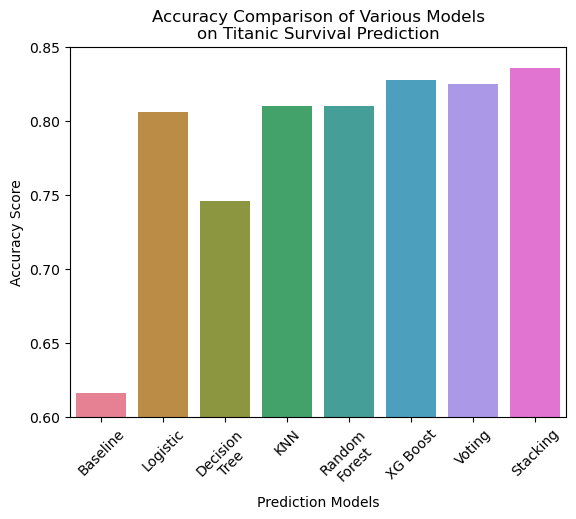

In [51]:
# Create a dictionary of models' performances
accuracy_dictionary = {'Baseline' : baseline_accuracy,
                       'Logistic' : logistic_accuracy,
                       'Decision\nTree' : dt_accuracy,
                       'KNN': knn_accuracy,
                       'Random\nForest': rf_accuracy,
                       'XG Boost': xgb_accuracy,
                       'Voting': voting_accuracy,
                       'Stacking': stacking_accuracy}


# Create a dataframe using dictionary
accuracy_df = pd.DataFrame(accuracy_dictionary, index=range(1))

# Create a bar graph to comapare models
fig, ax = plt.subplots()
sns.barplot(data=accuracy_df, palette='husl')
ax.set_xticklabels(labels=accuracy_df.columns, rotation=45)
plt.ylim([0.6, 0.85])
plt.xlabel("Prediction Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Comparison of Various Models\non Titanic Survival Prediction")
plt.show()


- The stacking classifier did the best job on the test data.
- Although stacking classifier's metrics on cross-validation wasn't the best, it still came in third. More importantly, its gap with performance on test data was the smallest of all models.
- We will select the stacking classifier as our final model and survey it carefully.

In [52]:
stacking_model

StackingClassifier(estimators=[('rf_model',
                                Pipeline(steps=[('ct',
                                                 ColumnTransformer(transformers=[('ss',
                                                                                  Pipeline(steps=[('ss',
                                                                                                   StandardScaler())]),
                                                                                  ['age',
                                                                                   'fare',
                                                                                   'sibsp',
                                                                                   'parch']),
                                                                                 ('oe',
                                                                                  Pipeline(steps=[('oe',
                                                                                                   OrdinalEncoder())]),
                                                                                  ['class']),
                                                                                 ('ohe',
                                                                                  Pipeline(steps=[('ohe',
                                                                                                   OneHotEncoder(drop='first',
                                                                                                                 handle_unknown='ignore'))]),
                                                                                  ['who',
                                                                                   'adult_male',
                                                                                   'deck',
                                                                                   'e...
                                                               interaction_constraints='',
                                                               learning_rate=0.1,
                                                               max_bin=256,
                                                               max_cat_threshold=64,
                                                               max_cat_to_onehot=4,
                                                               max_delta_step=0,
                                                               max_depth=3,
                                                               max_leaves=0,
                                                               min_child_weight=1,
                                                               missing=nan,
                                                               monotone_constraints='()',
                                                               n_estimators=1000,
                                                               n_jobs=0,
                                                               num_parallel_tree=1,
                                                               predictor='auto',
                                                               random_state=817, ...))]))],
                   final_estimator=LogisticRegression(C=0.1, random_state=817,
                                                      solver='newton-cg'))

## Evaluation

In [53]:
# Calculate permutation importance for the stacking classifier
results = permutation_importance(
    stacking_model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=817)

# Print the feature importances sorted by importance
importance_scores = results.importances_mean
sorted_indices = importance_scores.argsort()[::-1]

# Print feature importances and also create a dictionary for it
feature_importance_dict = dict()
for index in sorted_indices:
    print(f'Feature {index}: {X_train.columns[index]},{importance_scores[index]}')
    feature_importance_dict[X_train.columns[index]] = importance_scores[index]


Feature 6: who,0.1555970149253731
Feature 5: class,0.03805970149253729
Feature 4: fare,0.021641791044776103
Feature 7: adult_male,0.01231343283582086
Feature 1: age,0.011194029850746223
Feature 2: sibsp,0.010447761194029815
Feature 8: deck,0.0007462686567164089
Feature 0: sex,0.0
Feature 3: parch,-0.0022388059701492933
Feature 9: embark_town,-0.004850746268656747
Feature 10: alone,-0.005597014925373156


- First look on this output suggests that whether a person on board is identified as adult male, adult female or children (summarized in the column `who`) is the single most important factor in predicting survival rate. In fact, its importance is not comparatable in magnitude to any other variables in the data.
- `class` and `fare` which may be correlated, make up the next group of important factors.

Let's create a better visualization tool for feature importances.

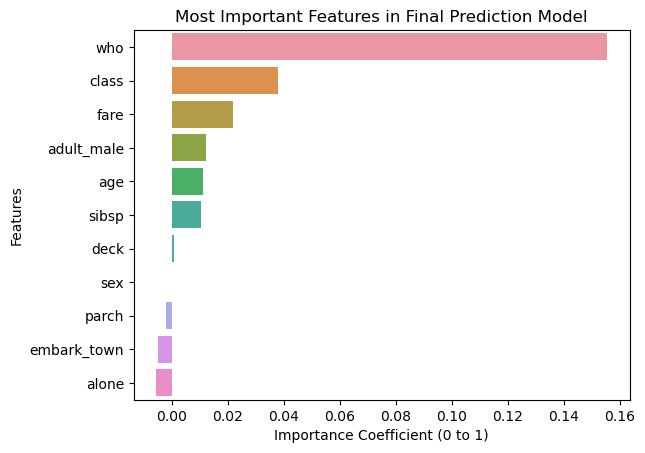

In [54]:
# Create a dataframe of important features
feature_importance_df = pd.DataFrame(feature_importance_dict, index=range(1))

feature_importance_df = feature_importance_df.T.reset_index().rename(columns={'index':'feature',
                                                                              0:'importance'})

sns.barplot(x='importance', y='feature', data=feature_importance_df)
plt.title("Most Important Features in Final Prediction Model")
plt.xlabel("Importance Coefficient (0 to 1)")
plt.ylabel("Features")
plt.show()

- It is easily visible that `who` is the uncomparable factor in determining survival.
- `sex` was redundant after importances from `who` and `adult_male` repeatedly highlighted the significance of being classified.
- Whether there were parents or children together didn't affect survival much.
- `alone` is also repetive, and creates more errors only.
- `deck`, which had majority of its value come from imputation, is also not meaningful enough for building the prediction model.
- `sex`'s importance is almost negligible.
- `parch`, `embark_town` and `alone` impact the model negatively, but not strongly enough.

Let's examine the `who` group more thoroughly.

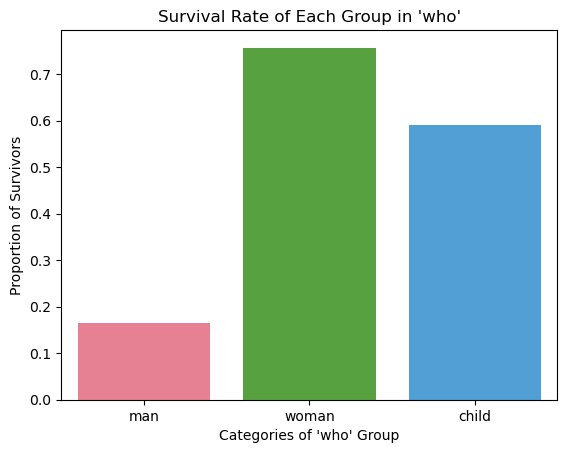

In [55]:
sns.barplot(x='who', y='survived', data=df, errorbar=None, palette='husl')
plt.xlabel("Categories of 'who' Group")
plt.ylabel("Proportion of Survivors")
plt.title("Survival Rate of Each Group in 'who'")
plt.show()

- This column classifies people into three groups: adult male, adult woman and child.
- The survival rate of each group indicates that this classification is highly predictive of person's survival.
- Men were nearly five times less likely to have survived than women and four times less likely to have survived than children.

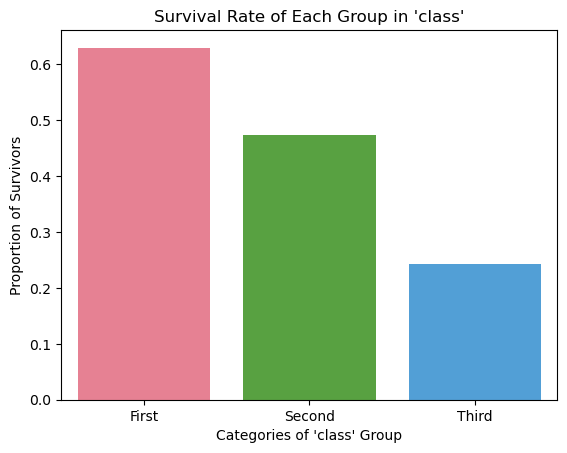

In [56]:
sns.barplot(x='class', y='survived', data=df, errorbar=None, palette='husl')
plt.xlabel("Categories of 'class' Group")
plt.ylabel("Proportion of Survivors")
plt.title("Survival Rate of Each Group in 'class'")
plt.show()

- `class` was the only ordinal data in our dataset.
- The graph shows us that higher classes porportionally correspond to higher survival rates.

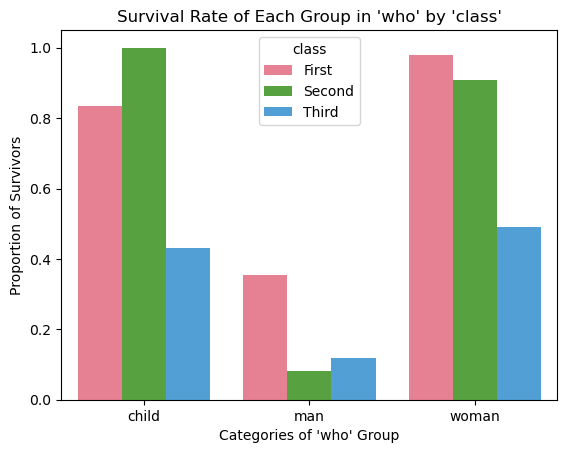

In [57]:
prop_df = df.groupby(['who', 'class'])['survived'].mean().reset_index()

sns.barplot(x='who', y='survived', data=prop_df, hue='class', palette='husl')
plt.xlabel("Categories of 'who' Group")
plt.ylabel("Proportion of Survivors")
plt.title("Survival Rate of Each Group in 'who' by 'class'")
plt.show()


- This graph shows survival rates of a person based on what category he/she belongs in `who` and `class`.
- First class did the best on survival for men and women, but not for children.
- The effect of being first class was greatest for men.

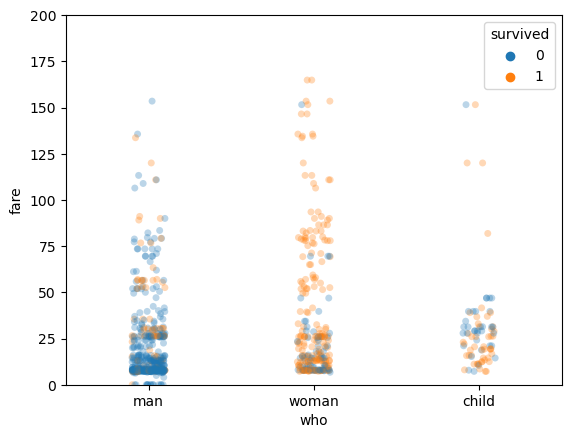

In [58]:
# Show each observation with a scatterplot
sns.stripplot(x='who', y='fare', hue='survived', data=df, alpha=0.3)
plt.ylim([0, 200])
plt.show()

- This graph summarizes what we learned in one picture.
- Men are most likely to fail, and higher fare prices correlate to better chances.

## Conclusion

In conclusion, this Titanic project aimed to predict the survival of passengers based on various features such as age, gender, class, and fare. After performing exploratory data analysis, feature engineering, and model selection, the final model achieved an accuracy of 83.6% on the test dataset. This indicates that the model can predict the survival of passengers with a high level of accuracy, which can be useful in real-world scenarios.

Several factors were found to be important predictors of survival, including gender, age, and class. Females had a significantly higher chance of survival compared to males, while younger passengers had a higher chance of survival than older passengers. Passengers in the first and second class had a higher chance of survival compared to those in the third class.

Overall, this project highlights the importance of careful data preparation, feature engineering, and model selection in improving the accuracy of machine learning models. The high accuracy achieved in this project suggests that the selected features and model algorithms were effective in predicting survival, and could potentially be used in real-world scenarios to assist in disaster response planning or other related applications.







## Next Steps

- More data: We can definitely get more data on person-specific information such as: finding their suffices, education level, past ocean travel history, etc.
- Given more time, we can always try different combinations of models with different hyperparameters.